### Ακολουθεί ανάλυση στο AUTOS-IMPORTS-85 dataset(https://www.kaggle.com/datasets/fazilbtopal/auto85?resource=download) όπου αφού κρατάμε τα σημαντικότερα features , εξετάζοντας μια σειρά από μοντέλα,καταλήγουμε σε αυτό που δίνει τα καλύτερα αποτελέσματα.

In [2]:
import pandas as pd

dataset = pd.read_csv('auto.csv')
dataset.columns = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Ακολουθεί ανάλυση στο AUTOS-IMPORTS-85 dataset(https://networkrepository.com/autos-imports-85.php) όπου αφού κρατάμε τα σημαντικότερα features , εξετάζοντας μια σειρά από μοντέλα,καταλήγουμε σε αυτό που δίνει τα καλύτερα αποτελέσματα.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [ ]:
import numpy as np
data = dataset.replace('?',np.NaN)

In [ ]:
import sklearn
X = data.drop('price',1)
y = data['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test =train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())
y_train = y_train.fillna(y_train.median())
y_test = y_test.fillna(y_train.median())

In [ ]:
X_train['num-of-doors'].fillna(X_train['num-of-doors'].mode(),inplace=True)
X_test['num-of-doors'].fillna(X_train['num-of-doors'].mode(),inplace=True)

In [ ]:
X_train['num-of-doors'].mode()

0    four
dtype: object

In [ ]:
X_train['num-of-doors'].fillna(value='four',inplace=True)
X_test['num-of-doors'].fillna(value='four',inplace=True)

In [ ]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (142, 25) (142,)
Test (62, 25) (62,)


In [ ]:
dictionary={'alfa-romero': 1,'audi': 2,
 'bmw':3,'chevrolet': 4,'dodge':5,'honda':6,'isuzu':7,'jaguar':8,'mazda':9,'mercedes-benz':10,'mercury':11,'mitsubishi':12,
 'nissan':13,'peugot':14,'plymouth': 15,'porsche': 16,'renault': 17,'saab':18,'subaru': 19,'toyota': 20,'volkswagen':21,'volvo': 22}
X_train['make'] = X_train['make'].map(dictionary)
dictionary = {'gas': 0,'diesel': 1}
X_train['fuel-type'] =X_train['fuel-type'].map(dictionary)
dictionary ={ 'std' : 0,'turbo' : 1}
X_train['aspiration'] = X_train['aspiration'].map(dictionary)
dictionary = {'two' : 0,'four' :1}
X_train['num-of-doors'] = X_train['num-of-doors'].map(dictionary)
dictionary = {'hardtop': 1, 'wagon':2, 'sedan':3, 'hatchback':4, 'convertible':5 }
X_train['body-style'] = X_train['body-style'].map(dictionary)
dictionary = { '4wd':1, 'fwd':2, 'rwd':3}
X_train['drive-wheels'] = X_train['drive-wheels'].map(dictionary)
dictionary = {'front': 0, 'rear': 1}
X_train['engine-location'] = X_train['engine-location'].map(dictionary)
dictionary = {'dohc':1, 'dohcv' :2, 'l':3, 'ohc':4, 'ohcf':5, 'ohcv':6, 'rotor':7}
X_train['engine-type'] = X_train['engine-type'].map(dictionary)
dictionary = { 'eight':8, 'five':5, 'four':4, 'six':6, 'three':3, 'twelve':12, 'two':2}
X_train['num-of-cylinders'] = X_train['num-of-cylinders'].map(dictionary)
dictionary = {'1bbl':1, '2bbl':2, '4bbl':3, 'idi':4, 'mfi':5, 'mpfi':6, 'spdi':7, 'spfi':8}
X_train['fuel-system'] = X_train['fuel-system'].map(dictionary)


In [ ]:
dictionary={'alfa-romero': 1,'audi': 2,
 'bmw':3,'chevrolet': 4,'dodge':5,'honda':6,'isuzu':7,'jaguar':8,'mazda':9,'mercedes-benz':10,'mercury':11,'mitsubishi':12,
 'nissan':13,'peugot':14,'plymouth': 15,'porsche': 16,'renault': 17,'saab':18,'subaru': 19,'toyota': 20,'volkswagen':21,'volvo': 22}
X_test['make'] = X_test['make'].map(dictionary)
dictionary = {'gas': 0,'diesel': 1}
X_test['fuel-type'] =X_test['fuel-type'].map(dictionary)
dictionary ={ 'std' : 0,'turbo' : 1}
X_test['aspiration'] = X_test['aspiration'].map(dictionary)
dictionary = {'two' : 0,'four' :1}
X_test['num-of-doors'] = X_test['num-of-doors'].map(dictionary)
dictionary = {'hardtop': 1, 'wagon':2, 'sedan':3, 'hatchback':4, 'convertible':5 }
X_test['body-style'] = X_test['body-style'].map(dictionary)
dictionary = { '4wd':1, 'fwd':2, 'rwd':3}
X_test['drive-wheels'] = X_test['drive-wheels'].map(dictionary)
dictionary = {'front': 0, 'rear': 1}
X_test['engine-location'] = X_test['engine-location'].map(dictionary)
dictionary = {'dohc':1, 'dohcv' :2, 'l':3, 'ohc':4, 'ohcf':5, 'ohcv':6, 'rotor':7}
X_test['engine-type'] = X_test['engine-type'].map(dictionary)
dictionary = { 'eight':8, 'five':5, 'four':4, 'six':6, 'three':3, 'twelve':12, 'two':2}
X_test['num-of-cylinders'] = X_test['num-of-cylinders'].map(dictionary)
dictionary = {'1bbl':1, '2bbl':2, '4bbl':3, 'idi':4, 'mfi':5, 'mpfi':6, 'spdi':7, 'spfi':8}
X_test['fuel-system'] = X_test['fuel-system'].map(dictionary)


In [ ]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)

Feature 0: 0.188883
Feature 1: 0.266265
Feature 2: 0.208886
Feature 3: 0.063530
Feature 4: 0.071286
Feature 5: 0.043249
Feature 6: 0.093245
Feature 7: 0.352997
Feature 8: 0.000000
Feature 9: 0.546468
Feature 10: 0.713871
Feature 11: 0.705516
Feature 12: 0.362796
Feature 13: 0.858844
Feature 14: 0.152323
Feature 15: 0.265146
Feature 16: 0.754126
Feature 17: 0.503580
Feature 18: 0.421337
Feature 19: 0.338191
Feature 20: 0.067015
Feature 21: 0.866349
Feature 22: 0.099054
Feature 23: 0.638521
Feature 24: 0.733076


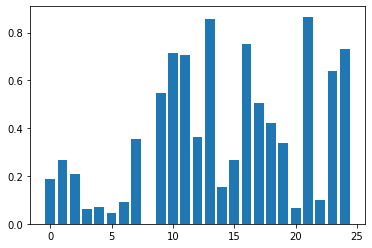

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


### Permutation Feature Importance for Regression

Feature: 0, Score: 0.00000
Feature: 1, Score: -21493.43245
Feature: 2, Score: -606.37296
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 6152.11268
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: -10584.14817
Feature: 11, Score: 0.00000
Feature: 12, Score: 6152.11268
Feature: 13, Score: 100407869.75200
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 5877.19132
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: -35636.86879
Feature: 22, Score: 12291540.61730
Feature: 23, Score: 0.00000
Feature: 24, Score: -909.55944


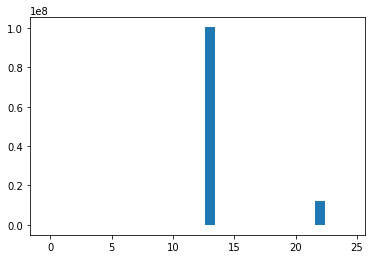

In [ ]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset

# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X_train, y_train)
# perform permutation importance
results = permutation_importance(model, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Backward Selection

Αφαιρούμε όσα features έχουν p-value>0.05

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X_train)
#Fitting sm.OLS model
model = sm.OLS(y_train,X_1).fit()
model.pvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


const                4.024058e-01
symboling            5.347950e-01
normalized-losses    1.751387e-01
make                 4.868590e-06
fuel-type            9.727145e-01
aspiration           3.440824e-01
num-of-doors         4.709830e-01
body-style           9.085232e-01
drive-wheels         7.632495e-02
engine-location      5.255786e-09
wheel-base           2.076304e-01
length               2.549216e-01
width                9.806313e-01
height               9.921718e-01
curb-weight          2.263216e-01
engine-type          2.906407e-01
num-of-cylinders     1.148196e-01
engine-size          8.811661e-06
fuel-system          6.406758e-02
bore                 1.889837e-02
stroke               1.410721e-03
compression-ratio    9.486083e-01
horsepower           3.358512e-01
peak-rpm             1.065767e-01
city-mpg             5.023844e-01
highway-mpg          5.539406e-01
dtype: float64

In [ ]:
#Backward Eliminationug
cols = list(pd.DataFrame(X_train).columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = pd.DataFrame(X_train)[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(pd.DataFrame(y_train),X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['make', 'aspiration', 'drive-wheels', 'engine-location', 'wheel-base', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke']


In [ ]:
X_train = X_train[['make', 'aspiration', 'drive-wheels', 'engine-location', 'wheel-base', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke']]


In [ ]:
X_test = X_test[['make', 'aspiration', 'drive-wheels', 'engine-location', 'wheel-base', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke']]

In [ ]:
X_train

,make,aspiration,drive-wheels,engine-location,wheel-base,num-of-cylinders,engine-size,fuel-system,bore,stroke
122,15.0,0.0,2.0,0.0,103.3,4.0,122.0,2.0,3.35,3.46
83,12.0,1.0,2.0,0.0,95.9,4.0,156.0,7.0,3.59,3.86
19,4.0,0.0,2.0,0.0,94.5,4.0,90.0,2.0,3.03,3.11
154,20.0,0.0,1.0,0.0,95.7,4.0,92.0,2.0,3.05,3.03
107,14.0,1.0,3.0,0.0,107.9,4.0,152.0,4.0,3.70,3.52
...,...,...,...,...,...,...,...,...,...,...
67,10.0,1.0,3.0,0.0,110.0,5.0,183.0,4.0,3.58,3.64
192,21.0,0.0,2.0,0.0,100.4,4.0,109.0,6.0,3.19,3.40
117,15.0,0.0,2.0,0.0,93.7,4.0,90.0,2.0,2.97,3.23
47,8.0,0.0,3.0,0.0,113.0,6.0,258.0,6.0,3.63,4.17


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.svm import SVR
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import time

# αρχικοποιούμε τους μετασχηματιστές χωρίς υπερ-παραμέτρους
scaler = StandardScaler()
pca = PCA()
n_components = [3, 5, 7, 8, 10, 12, 13]

def compute_metrics(model, x_tr, y_tr, x_ts, y_ts):
    train_predict = model.predict(x_tr)
    test_predict = model.predict(x_ts)

    # Υπολογισμός Ορθότητας (Accuracy)
    train_accuracy = r2_score(y_tr, train_predict)
    test_accuracy = r2_score(y_ts, test_predict)

    # Υπολογισμός Μέσου Τετραγωνικού Σφάλματος
    train_MSE = mean_squared_error(y_tr, train_predict)
    test_MSE = mean_squared_error(y_ts, test_predict)

    print('Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: {:.2%}'.format(
      train_accuracy))
    print('Ορθότητα στο σύνολο δεδομένων ελέγχου: {:.2%}\n'.format(test_accuracy))
    print('Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: {:.4f}'.format(
      train_MSE))
    print('Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: {:.4f}'.format(test_MSE))
    return train_predict, test_predict, train_accuracy, test_accuracy, train_MSE, test_MSE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
names = ['Linear','Polynomial', 'Elastic-Net', 'Lasso', 'Tree', 'kNN', 'Forest', 'BGR']
times = []
CV_times = []
r2 = []
MSE = []

### Ordinary Leat Squares

In [ ]:
start_time = time.time()
clf = LinearRegression()
clf.fit(X_train, y_train)
train_predict, test_predict, train_accuracy, test_accuracy, train_MSE, test_MSE = compute_metrics(clf, X_train, y_train, X_test, y_test)
times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

CV_times.append(0)
r2.append(test_accuracy)
MSE.append(test_MSE)


Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 88.51%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 76.72%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 7828341.0964
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 11204501.3611
Συνολικός χρόνος fit και predict: 0.03200221061706543 seconds


### Elastic Net

In [ ]:
start_time = time.time()
en = ElasticNet()
en.fit(X_train,y_train)
compute_metrics(en, X_train, y_train, X_test, y_test)
times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))


Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 80.74%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 72.81%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 13121908.0188
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 13085370.8662
Συνολικός χρόνος fit και predict: 0.012291431427001953 seconds




Hyperparameter Tuning



In [ ]:
l1 = np.arange(0.1,1,0.2)
alphas = np.arange(0,2,0.1)
pipe_en = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('ElasticNet', en)], memory = 'tmp')
estimator_en = GridSearchCV(pipe_en, dict( pca__n_components=n_components, ElasticNet__alpha=alphas , ElasticNet__l1_ratio=l1), cv=5, scoring ='r2', n_jobs=-1)
start_time = time.time()
estimator_en.fit(X_train, y_train)
train_predict, test_predict, train_accuracy, test_accuracy, train_MSE, test_MSE = compute_metrics(estimator_en, X_train, y_train, X_test, y_test)
CV_times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

r2.append(test_accuracy)
MSE.append(test_MSE)

Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 88.37%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 76.28%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 7920310.7049
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 11418432.9516
Συνολικός χρόνος fit και predict: 28.183228969573975 seconds


### Lasso

In [ ]:
start_time = time.time()
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)
compute_metrics(lasso, X_train, y_train, X_test, y_test)
times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 88.51%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 76.77%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 7828561.8858
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 11182738.3137
Συνολικός χρόνος fit και predict: 0.009190559387207031 seconds


Hyperparameter Tuning

In [ ]:
alphas = [2,3,5,9,11,12,14]
pipe_lasso = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('lasso', lasso)], memory = 'tmp')
estimator_lasso = GridSearchCV(pipe_lasso, dict( pca__n_components=n_components, lasso__alpha=alphas ), cv=5, scoring ='r2', n_jobs=-1)
start_time = time.time()
estimator_lasso.fit(X_train, y_train)
train_predict, test_predict, train_accuracy, test_accuracy, train_MSE, test_MSE = compute_metrics(estimator_lasso, X_train, y_train, X_test, y_test)
CV_times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

r2.append(test_accuracy)
MSE.append(test_MSE)

Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 88.50%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 76.74%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 7836040.3763
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 11193262.0697
Συνολικός χρόνος fit και predict: 2.054358720779419 seconds


### Decision Tree

In [ ]:
start_time = time.time()
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)
compute_metrics(tree, X_train, y_train, X_test, y_test)
times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 98.31%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 84.20%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 1151326.3556
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 7605304.9890
Συνολικός χρόνος fit και predict: 0.01006460189819336 seconds


 Hyperparameter Tuning

In [ ]:
alphas = np.arange(1,7,1)
tree = DecisionTreeRegressor(random_state=0)
pipe_tree = Pipeline(steps=[('scaler', scaler), ('tree', tree)], memory = 'tmp')
treeCV = GridSearchCV(pipe_tree,dict(tree__ccp_alpha=alphas) , cv=5, scoring ='r2', n_jobs=-1)

start_time = time.time()
treeCV.fit(X_train, y_train)

train_predict, test_predict, train_accuracy, test_accuracy, train_MSE, test_MSE = compute_metrics(treeCV, X_train, y_train, X_test, y_test)
CV_times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

r2.append(test_accuracy)
MSE.append(test_MSE)

Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 98.31%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 84.20%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 1151326.3556
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 7605304.9890
Συνολικός χρόνος fit και predict: 0.2550320625305176 seconds


### KN-neighbors

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=3)
start_time = time.time()
neigh.fit(X_train, y_train)
compute_metrics(neigh, X_train, y_train, X_test, y_test)
times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 88.76%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 79.39%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 7653868.0689
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 9920662.1523
Συνολικός χρόνος fit και predict: 0.009941339492797852 seconds


Hyperparameter Tuning

In [ ]:
algos = ['auto', 'ball_tree', 'kd_tree', 'brute']
num = [1,2,3,4,5,6]
pipe_neigh = Pipeline(steps=[('scaler', scaler), ('neigh', neigh)], memory = 'tmp')
neighCV = GridSearchCV(pipe_neigh, dict( neigh__algorithm =algos, neigh__n_neighbors=num ), cv=5, scoring ='r2', n_jobs=-1)

start_time = time.time()
treeCV.fit(X_train, y_train)
train_predict, test_predict, train_accuracy, test_accuracy, train_MSE, test_MSE = compute_metrics(treeCV, X_train, y_train, X_test, y_test)
CV_times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

r2.append(test_accuracy)
MSE.append(test_MSE)

Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 98.31%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 84.20%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 1151326.3556
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 7605304.9890
Συνολικός χρόνος fit και predict: 0.26026010513305664 seconds


### Gradient Boosting Regressor

In [ ]:
GBR = GradientBoostingRegressor()
start_time = time.time()
GBR.fit(X_train, y_train)
compute_metrics(GBR, X_train, y_train, X_test, y_test)
times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 97.88%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 88.44%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 1447132.3089
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 5563863.5864
Συνολικός χρόνος fit και predict: 0.05629992485046387 seconds


Hyperparameter Tuning

In [ ]:
alphas = np.arange(0.0,1.0,0.1)
GBR = GradientBoostingRegressor()
pipe_gbr = Pipeline(steps=[ ('scaler', scaler),('GBR', GBR)], memory = 'tmp')
gbrCV = GridSearchCV(pipe_gbr, dict( estimator__GBR__alpha = alphas ), cv=5, scoring ='r2', n_jobs=-1)

start_time = time.time()
gbrCV.fit(X_train, y_train)
train_predict, test_predict, train_accuracy, test_accuracy, train_MSE, test_MSE = compute_metrics(gbrCV, X_train, y_train, X_test, y_test)
CV_times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

r2.append(test_accuracy)
MSE.append(test_MSE)


In [ ]:
#from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.ensemble  import GradientBoostingRegressor
# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.decomposition import PCA
scaler = StandardScaler()
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
pca = PCA()
GBR = GradientBoostingRegressor()
pipe = Pipeline(steps=[ ('scaler', scaler),('GBR', GBR)], memory = 'tmp')

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = { 
    'n_estimators': [5, 50, 250,500],
    'max_depth': [1,3,5,7,9],
    }
estimator = GridSearchCV(pipe, dict( estimator__GBR__n_estimators =n_estimators, estimator__GBR__max_depth=max_depth  ), cv=5, scoring='r2', n_jobs=-1)
estimator.fit(X_train, y_train)
compute_metrics(estimator, X_train, y_train, X_test, y_test)
times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

NameError: ignored

In [ ]:
estimator.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__scaler', 'estimator__GBR', 'estimator__scaler__copy', 'estimator__scaler__with_mean', 'estimator__scaler__with_std', 'estimator__GBR__alpha', 'estimator__GBR__ccp_alpha', 'estimator__GBR__criterion', 'estimator__GBR__init', 'estimator__GBR__learning_rate', 'estimator__GBR__loss', 'estimator__GBR__max_depth', 'estimator__GBR__max_features', 'estimator__GBR__max_leaf_nodes', 'estimator__GBR__min_impurity_decrease', 'estimator__GBR__min_impurity_split', 'estimator__GBR__min_samples_leaf', 'estimator__GBR__min_samples_split', 'estimator__GBR__min_weight_fraction_leaf', 'estimator__GBR__n_estimators', 'estimator__GBR__n_iter_no_change', 'estimator__GBR__presort', 'estimator__GBR__random_state', 'estimator__GBR__subsample', 'estimator__GBR__tol', 'estimator__GBR__validation_fraction', 'estimator__GBR__verbose', 'estimator__GBR__warm_start', 'estimator', 'iid', 'n_jobs', 'param_grid', 'p

### Random Forest

In [ ]:
rd_for = RandomForestRegressor(random_state=0)
start_time = time.time()
rd_for.fit(X_train, y_train)
compute_metrics(rd_for, X_train, y_train, X_test, y_test)
times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 96.20%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 88.99%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 2586367.6786
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 5297402.8838
Συνολικός χρόνος fit και predict: 0.16268157958984375 seconds


Hyperparameter Tuning

In [ ]:
#from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.ensemble  import RandomForestRegressor
# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.decomposition import PCA

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
pca = PCA()
rfc=RandomForestRegressor()
pipe = Pipeline(steps=[('pca', pca), ('RFC', rfc)], memory = 'tmp')

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = { 
    'pca__n_components': [5, 10, 15,20,25],
    'RFC__max_features': ['auto', 'sqrt', 'log2', None], 
    'RFC__n_estimators': [1, 3, 5, 7, 9]
    }
estimator = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
estimator.fit(X_train, y_train)
compute_metrics(estimator, X_train, y_train, X_test, y_test)
times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 95.83%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 86.54%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 2838444.3466
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 6476235.6573
Συνολικός χρόνος fit και predict: 238.74372124671936 seconds


In [ ]:
rdforCV.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__scaler', 'estimator__rd_for', 'estimator__scaler__copy', 'estimator__scaler__with_mean', 'estimator__scaler__with_std', 'estimator__rd_for__bootstrap', 'estimator__rd_for__ccp_alpha', 'estimator__rd_for__criterion', 'estimator__rd_for__max_depth', 'estimator__rd_for__max_features', 'estimator__rd_for__max_leaf_nodes', 'estimator__rd_for__max_samples', 'estimator__rd_for__min_impurity_decrease', 'estimator__rd_for__min_impurity_split', 'estimator__rd_for__min_samples_leaf', 'estimator__rd_for__min_samples_split', 'estimator__rd_for__min_weight_fraction_leaf', 'estimator__rd_for__n_estimators', 'estimator__rd_for__n_jobs', 'estimator__rd_for__oob_score', 'estimator__rd_for__random_state', 'estimator__rd_for__verbose', 'estimator__rd_for__warm_start', 'estimator', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test) 

### MLP

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor()
regr.fit(X_train, y_train)
compute_metrics(regr, X_train, y_train, X_test, y_test)
times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: -208.34%
Ορθότητα στο σύνολο δεδομένων ελέγχου: -275.54%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 210042731.2597
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 180745139.6681
Συνολικός χρόνος fit και predict: 2000.4876172542572 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
'pca__n_components': [5, 10, 15,20,25],

### Hyperparameter Tuning

In [ ]:
from sklearn.grid_search import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.decomposition import PCA
regr = MLPRegressor()

gs = GridSearchCV(nn, param_grid={
    'learning_rate': [0.05, 0.01, 0.005, 0.001],
    'hidden0__units': [4, 8, 12],
    'hidden0__type': ["Rectifier", "Sigmoid", "Tanh"]})
gs.fit(X, y)

### Ridge Regression

In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge()
reg.fit(X_train,y_train)
compute_metrics(reg, X_train, y_train, X_test, y_test)
times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 87.63%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 78.60%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 8423691.4908
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 10297829.7278
Συνολικός χρόνος fit και predict: 1376.81081366539 seconds


Hyperparameter Tuning

In [ ]:
alpha = [0.05,0.08,0.1,0.2,0.3]
n_components = [3, 5, 7, 8, 10, 12, 13]
reg = linear_model.Ridge()
scaler = StandardScaler()
pca = PCA()
pipe_reg = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('reg', reg)], memory = 'tmp')
estimator_reg = GridSearchCV(pipe_reg, dict( pca__n_components=n_components, reg__alpha=alphas ), cv=5, scoring ='r2', n_jobs=-1)
start_time = time.time()
estimator_reg.fit(X_train, y_train)
train_predict, test_predict, train_accuracy, test_accuracy, train_MSE, test_MSE = compute_metrics(estimator_lasso, X_train, y_train, X_test, y_test)
CV_times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

r2.append(test_accuracy)
MSE.append(test_MSE)

Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 88.48%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 76.51%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 7849369.9673
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 11306445.4658
Συνολικός χρόνος fit και predict: 6.574898719787598 seconds


In [ ]:
estimator_reg.best_params_

{'pca__n_components': 10, 'reg__alpha': 0.6000000000000001}

### Gradient Boosting Regressor

In [ ]:
GBR = GradientBoostingRegressor(random_state=0)
start_time = time.time()
GBR.fit(X_train, y_train)
compute_metrics(GBR, X_train, y_train, X_test, y_test)
times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 97.88%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 88.52%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 1447132.3089
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 5526827.7840
Συνολικός χρόνος fit και predict: 0.053457021713256836 seconds


Hyperparameter Tuning

In [ ]:
n_estimators=[25,50,100,150,200]
GBR = GradientBoostingRegressor()

pipe_gbr = Pipeline(steps=[('scaler', scaler), ('GBR', GBR)], memory = 'tmp')
gbrCV = GridSearchCV(pipe_gbr, dict(GBR__n_estimators = n_estimators),cv=5, scoring ='r2', n_jobs=-1)

start_time = time.time()
gbrCV.fit(X_train, y_train)
train_predict, test_predict, train_accuracy, test_accuracy, train_MSE, test_MSE = compute_metrics(gbrCV, X_train, y_train, X_test, y_test)
CV_times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

r2.append(test_accuracy)
MSE.append(test_MSE)

Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 97.35%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 87.84%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 1808353.7027
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 5850261.6648
Συνολικός χρόνος fit και predict: 2.17792010307312 seconds


In [ ]:
n_estimators=[25,50,100,150,200]
max_depth=[1,3,5,7,9]
GBR = GradientBoostingRegressor()

pipe_gbr = Pipeline(steps=[('scaler', scaler), ('GBR', GBR)], memory = 'tmp')
gbrCV = GridSearchCV(pipe_gbr, dict(GBR__n_estimators = n_estimators,GBR__max_depth= max_depth),cv=5, scoring ='r2', n_jobs=-1)

start_time = time.time()
gbrCV.fit(X_train, y_train)
train_predict, test_predict, train_accuracy, test_accuracy, train_MSE, test_MSE = compute_metrics(gbrCV, X_train, y_train, X_test, y_test)
CV_times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

r2.append(test_accuracy)
MSE.append(test_MSE)

Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 95.32%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 70.92%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 3185332.2518
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 13998048.2714
Συνολικός χρόνος fit και predict: 6.502625465393066 seconds


In [ ]:
gbrCV.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__scaler', 'estimator__GBR', 'estimator__scaler__copy', 'estimator__scaler__with_mean', 'estimator__scaler__with_std', 'estimator__GBR__alpha', 'estimator__GBR__ccp_alpha', 'estimator__GBR__criterion', 'estimator__GBR__init', 'estimator__GBR__learning_rate', 'estimator__GBR__loss', 'estimator__GBR__max_depth', 'estimator__GBR__max_features', 'estimator__GBR__max_leaf_nodes', 'estimator__GBR__min_impurity_decrease', 'estimator__GBR__min_impurity_split', 'estimator__GBR__min_samples_leaf', 'estimator__GBR__min_samples_split', 'estimator__GBR__min_weight_fraction_leaf', 'estimator__GBR__n_estimators', 'estimator__GBR__n_iter_no_change', 'estimator__GBR__presort', 'estimator__GBR__random_state', 'estimator__GBR__subsample', 'estimator__GBR__tol', 'estimator__GBR__validation_fraction', 'estimator__GBR__verbose', 'estimator__GBR__warm_start', 'estimator', 'iid', 'n_jobs', 'param_grid', 'p